# Recurrent Neural Network 실습 

## LSTM을 이용한 SIN 함수 예측하기

이번 실습은 RNN 네트워크인 LSTM을 이용한 sin 함수 또는 cos 함수와 같은 연속된 값을 예측하는 regression 모델을 구현해봅니다. 이 실습에 사용하는 코드는 https://github.com/mouradmourafiq/tensorflow-lstm-regression 를 기반으로 구성되었습니다.

* 참고: http://mourafiq.com/2016/05/15/predicting-sequences-using-rnn-in-tensorflow.html

### 1. 필요한 라이브러리  import

* numpy
* [pandas](http://pandas.pydata.org/about.html): 고성능 data structure 및 데이터 분석 패키지
* tensorflow
* [matplotlib](https://matplotlib.org): Python 2D plotting 라이브러리
* [sklearn](http://scikit-learn.org/stable/): python machine learning 라이브러리


* [lstm.py](./lstm.py): LSTM 네트워크 구현
* data_processing: 학습, 검증 데이터 생성

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

from tensorflow.contrib import learn
from sklearn.metrics import mean_squared_error

from lstm import lstm_model
from data_processing import generate_data

### 2. Model에 대한 hyperparameter 정의

* TIMESTEPS:
* RNN_LAYERS:
* DENSE_LAYERS:
* TRAINING_STEPS:
* BATCH_SIZE:

In [4]:
LOG_DIR = './ops_logs/sin'
TIMESTEPS = 3
RNN_LAYERS = [{'num_units': 5}]
DENSE_LAYERS = None
TRAINING_STEPS = 10 #10000
PRINT_STEPS = TRAINING_STEPS / 10
BATCH_SIZE = 100

### 3. LSTM 네트워크 정의

Hyperparameter를 이용해서 LSTM 네트워크를 정의합니다.

In [5]:
regressor = learn.SKCompat(learn.Estimator(
    model_fn=lstm_model(
        TIMESTEPS,
        RNN_LAYERS,
        DENSE_LAYERS
    ),
    model_dir=LOG_DIR
))

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_checkpoints_secs': 600, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_save_summary_steps': 100, '_evaluation_master': '', '_model_dir': './ops_logs/sin', '_task_type': None, '_environment': 'local', '_save_checkpoints_steps': None, '_num_ps_replicas': 0, '_keep_checkpoint_every_n_hours': 10000, '_num_worker_replicas': 0, '_session_config': None, '_task_id': 0, '_is_chief': True, '_master': '', '_keep_checkpoint_max': 5, '_tf_random_seed': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fdeca609198>}


### 4. 학습 데이터 생성

* generate_data: sin 함수를 이용한 학습 데이터를 생성합니다.
* learn.monitors.ValidationMonitor를 이용해서, 학습이 진행되는 동안 test 데이터로 모델의 성능을 검증합니다. every_n_steps은 몇번의 step 마다 검증을 수행할지를 정의합니다.

Instructions for updating:
Monitors are deprecated. Please use tf.train.SessionRunHook.


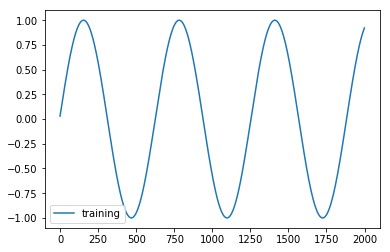

In [6]:
X, y = generate_data(np.sin, np.linspace(0, 100, 10000, dtype=np.float32), TIMESTEPS, seperate=False)
plot_training, = plt.plot(y['train'][:2000], label='training')
plt.legend(handles=[plot_training])

# create a lstm instance and validation monitor
validation_monitor = learn.monitors.ValidationMonitor(X['val'], y['val'],
                                                     every_n_steps=PRINT_STEPS,
                                                     early_stopping_rounds=1000)
#print(X['train'])
#print(y['train'])

### 5. 학습 수행

fit 함수를 이용한 학습을 수행합니다. batch_size는 한번에 학습시킬 (또는 몇개의 데이터를 학습해서 파라메터를 업데이트할 것인지) 데이터 크기를 의미하며, steps는 batch를 몇개까지 학습에 사용할 것인지를 정의합니다.

> `#` of steps in 1 epoch = (# of training data) / (batch size)

학습이 진행되는 동안 loss 값이 어떻게 변하는지 관찰해보세요.

In [7]:
regressor.fit(X['train'], y['train'], 
              monitors=[validation_monitor], 
              batch_size=BATCH_SIZE,
              steps=TRAINING_STEPS)

Instructions for updating:
Use `tf.contrib.losses.mean_squared_error` and explicit logits computation.
Instructions for updating:
Use tf.losses.mean_squared_error instead.
Instructions for updating:
Use tf.losses.compute_weighted_loss instead.
Instructions for updating:
Use tf.losses.add_loss instead.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into ./ops_logs/sin/model.ckpt.
INFO:tensorflow:step = 1, loss = 0.727565
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example

SKCompat()

### 6. 모델에 대한 검증 수행

predict() 함수를 이용해서 이전에 학습된 모델을 검증합니다. 실제값과 예측값의 Mean Squared Error 값을 계산해봅니다.

In [8]:
predicted = regressor.predict(X['test'])
rmse = np.sqrt(((predicted - y['test']) ** 2).mean(axis=0))
score = mean_squared_error(predicted, y['test'])
print ("MSE: %f" % score)

Instructions for updating:
Use `tf.contrib.losses.mean_squared_error` and explicit logits computation.
Instructions for updating:
Use tf.losses.mean_squared_error instead.
Instructions for updating:
Use tf.losses.compute_weighted_loss instead.
Instructions for updating:
Use tf.losses.add_loss instead.
INFO:tensorflow:Restoring parameters from ./ops_logs/sin/model.ckpt-10
MSE: 0.010666


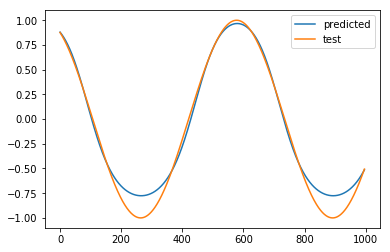

In [9]:
plot_predicted, = plt.plot(predicted, label='predicted')
plot_test, = plt.plot(y['test'], label='test')
plt.legend(handles=[plot_predicted, plot_test])

> <font color='red'>문제</font>
아래 명령을 수행해서 ops_logs/sin 디렉토리의 내용을 모두 삭제하고, TRAINING_STEPS 값을 변경해서 모델의 성능을 높여보세요.

In [ ]:
!ls ops_logs/sin
!rm -rf ops_logs/sin